In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data_path = 'Table_CSVs\energy_efficient.csv'
energy_consumption_df = pd.read_csv(data_path)

In [23]:
# Drop any rows with missing values
energy_consumption_df.dropna(inplace=True)

# Drop the 'DOEID' column and update the DataFrame
energy_consumption_df.drop('DOEID', axis=1, inplace=True)


In [35]:
# Define a function to perform binning on TOTALBTU column
def bin_total_btu(total_btu):
    if total_btu < 55000:
        return 'Low'
    elif total_btu >= 55000 and total_btu < 95000:
        return 'Medium'
    else:
        return 'High'

# Apply binning function to create a new column 'BTU_Bin'
energy_consumption_df['BTU_Bin'] = energy_consumption_df['TOTALBTU'].apply(bin_total_btu)

# Perform one-hot encoding on the 'BTU_Bin' column
X_encoded = pd.get_dummies(energy_consumption_df.drop(['TOTALBTU'], axis=1), columns=['BTU_Bin'], drop_first=True)
y = energy_consumption_df['TOTALBTU']

In [36]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.1, random_state=45)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 608309724.443556
R-squared (R2): 0.789263699402284


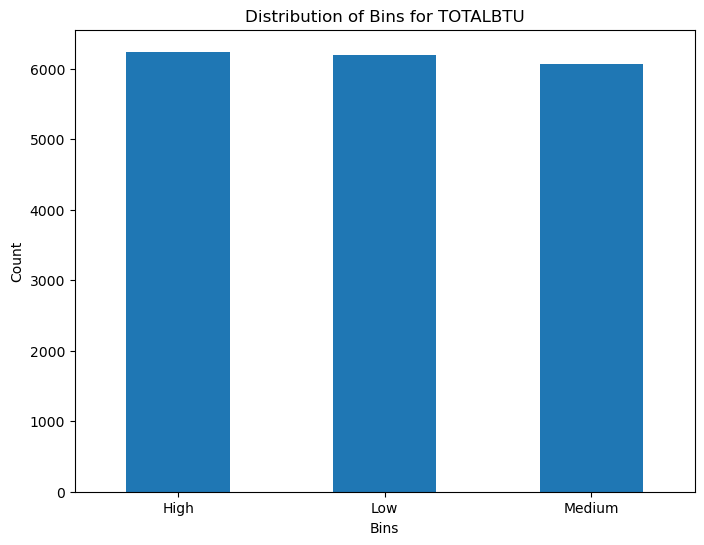

Counts of samples in each bin:
BTU_Bin
High      6240
Low       6194
Medium    6062
Name: count, dtype: int64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data_path = 'Table_CSVs\energy_efficient.csv'
energy_consumption_df = pd.read_csv(data_path)

# Drop any rows with missing values
energy_consumption_df.dropna(inplace=True)

# Drop the 'DOEID' column and update the DataFrame
energy_consumption_df.drop('DOEID', axis=1, inplace=True)

# Define a function to perform binning on TOTALBTU column
def bin_total_btu(total_btu):
    if total_btu < 55000:
        return 'Low'
    elif total_btu >= 55000 and total_btu < 95000:
        return 'Medium'
    else:
        return 'High'

# Apply binning function to create a new column 'BTU_Bin'
energy_consumption_df['BTU_Bin'] = energy_consumption_df['TOTALBTU'].apply(bin_total_btu)

# Check the balance of bins
bin_counts = energy_consumption_df['BTU_Bin'].value_counts()

# Plot the distribution of bins
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Bins for TOTALBTU')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()

# Display the counts of samples in each bin
print("Counts of samples in each bin:")
print(bin_counts)
